<a href="https://colab.research.google.com/github/Safasal/Hate-Speech-Detection/blob/main/Practicum_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hate Speech Detection


##Introduction:
As online content continues to expand, so does hate speech. While People may still have differences, they mostly learned to keep it civil in everyday face-to-face interaction, but unfortunately, the situation is widely different on social media. Hate speech became an everyday occurrence online, and it’s been linked to a global increase in violence toward minorities, risk of mental health issues, and so on.

Thus, my aim from this project is to help protect people from hate speech on social media bias against (race, color, religion, national origin, sexual orientation, gender, gender identity or disability), by using natural language processing and machine learning tools and techniques to draw insights from the data provided from social media (Reddit, facebook, Twitter, 4Chan), and to find the best algorithm that detect and classify hate speech text.

The algorithms that i will use are Naive Bayes, XGBClassifier, Random Forest, SVM, and Neural Network (RNN, CNN).

##Goal-: 
To predict whether input text are Hate Speech or not.

0 - Not Hate-Speech

1 - Hate-Speech

Datasets-: Seven datasets have been used from different sources such as (Kaggle, surge, github)

##Analysis:

- Importing all required libraries.

In [1]:
#import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
import re
from nltk.stem.snowball import SnowballStemmer
import itertools
import collections
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, auc, roc_curve, plot_roc_curve
import sklearn.metrics as mt
import xgboost as xgb
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.callbacks import EarlyStopping
from keras import regularizers
from tensorflow.keras import backend
from collections import Counter
from tensorflow.keras.preprocessing import sequence
from keras.layers import LSTM, Activation, Dropout, Input,SpatialDropout1D, MaxPooling1D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, GlobalAveragePooling1D
from keras.layers.embeddings import Embedding
import plotly.express as px
from sklearn.metrics import matthews_corrcoef
from sklearn import feature_selection
from scipy.stats import entropy
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


- Loading the datasets.

In [2]:
#import the datasets

data1 = pd.read_csv('HateSpeechDetection (1).csv')
data2 = pd.read_csv('labeled_data.csv')
data3 = pd.read_csv('train.csv')
data4 = pd.read_csv('train-toxic6.csv')
data5 = pd.read_csv('train_jsondata.csv')
data6 = pd.read_csv('surge.csv')
data7 = pd.read_csv('HateData.csv')

- Exploratory Data Analysis (EDA):
In this phase I will combine all datasets into one new dataset (df), by removing extra columns, converting all Label column into (1:hate, 0:nonhate), rename and reorder columns to match one another.
In the next phase i will explore the final combined data to understand the variables types, the size, the target classes ratios, and check for null values and duplicate values.
In the final EDA phase i will create some visualizations. I will plot the distribution of text length of each class, the distribution of setiments, and plotting the most common words from the text in a WordCloud for each class.

In [3]:
data1.head()

,Platform,Comment,Hateful
0,Reddit,Damn I thought they had strict gun laws in Ger...,0
1,Reddit,I dont care about what it stands for or anythi...,0
2,Reddit,It's not a group it's an idea lol,0
3,Reddit,So it's not just America!,0
4,Reddit,The dog is a spectacular dancer considering he...,0


In [4]:
data1.drop('Platform', axis=1, inplace=True) # removing unwanted columns
data1.rename(columns={"Hateful": "Label", "Comment": "Text"}, inplace=True) # renaming the columns

In [5]:
data2.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [6]:
data2.drop(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither'], axis=1, inplace=True)
data2.rename(columns={'class': 'Label', 'tweet': 'Text'}, inplace=True)
data2 = data2[['Text', 'Label']] # reordering the columns positions

In [7]:
# making all non-hate equal zero and all hate equal 1
data2 = data2[data2.Label != 1] 
data2.Label[data2.Label == 0] = 1 
data2.Label[data2.Label == 2] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [8]:
data2.tail()

,Text,Label
24767,"you know what they say, the early bird gets th...",0
24776,you're all niggers,1
24777,you're such a retard i hope you get type 2 dia...,1
24779,"you've gone and broke the wrong heart baby, an...",0
24782,~~Ruffled | Ntac Eileen Dahlia - Beautiful col...,0


In [9]:
data3.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [10]:
data3.drop('id', axis=1, inplace=True)
data3.rename(columns={'label': 'Label','tweet': 'Text'}, inplace=True)
data3 = data3[['Text', 'Label']]

In [11]:
data4.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [12]:
data4 = data4[data4['identity_hate']==1] # keeping only the rows with identity-hate
data4.drop(['id', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult'], axis=1, inplace=True)
data4.rename(columns={'comment_text': 'Text', 'identity_hate': 'Label'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
data5.drop(['id', 'img'], axis=1, inplace=True)
data5.rename(columns={"label": "Label", "text": "Text"}, inplace=True)
data5 = data5[['Text', 'Label']]

In [14]:
data5.tail()

,Text,Label
8495,nobody wants to hang auschwitz me,1
8496,when god grants you a child after 20 years of ...,1
8497,gays on social media: equality! body positivit...,1
8498,having a bad day? you could be a siamese twin ...,1
8499,i hate muslims too they take their religion to...,1


In [15]:
data6.head()

,worker_id,task_id,task_response_id,Tweet,Tweet Text,Hate speech?,Non Toxic Text That Contains Reclaimed Hate Speech / Is About Toxic Topic
0,RGDCWYTV6K79,f16c67ef-259c-4f09-9c98-f9c97a933779,4dbb7bf3-1e00-4d9b-a6ea-96b77e8764e4,https://twitter.com/femshlorp/status/155112563...,"Im a proud faggot, my existence makes some peo...",No,Yes
1,RGDCWYTV6K79,cba4d40a-df6b-46fa-8027-50d7cea01d12,3c94b361-cedd-4c32-95aa-22ae4e8999ba,https://twitter.com/cactusfru1ts/status/156686...,i mean. as a fag i would say fag is not necess...,No,Yes
2,RGDCWYTV6K79,55c810c8-35d6-4974-8747-7a06f0adfd07,622612d9-0929-4002-b44c-55558dd18c6b,https://twitter.com/christfamlee/status/148939...,So if you are 60 then you definitely were NOT ...,No,Yes
3,4TR6J693M9XK,31e56a4c-30a4-41ab-8d57-ec2979430e5c,31736a7d-2954-48c6-a064-9fe563faead8,https://twitter.com/Crypto_Ray976/status/15664...,Can't wait until everyone sees how evil you je...,Yes,No
4,7TQPVNV4CT2C,0e7b5152-7486-4e32-add3-bd3b4c37a3b8,cf0f615d-cd6c-4acc-9d3f-b3e92c57b5cd,https://twitter.com/Christianus47/status/15632...,Having to sell condoms to niggers is the worst...,Yes,No


In [16]:
data6.drop(['worker_id',	'task_id',	'task_response_id',	'Tweet',	'Non Toxic Text That Contains Reclaimed Hate Speech / Is About Toxic Topic'], axis=1, inplace=True)
data6.rename(columns={"Tweet Text": "Text", "Hate speech?": "Label"}, inplace=True)
data6['Label'] = data6['Label'].map({'Yes': 1, 'No': 0}) # making all non-hate equal zero and all hate equal 1 
data6 = data6[['Text', 'Label']]

In [17]:
data7 = data7[['test_case','label_gold']]
data7.label_gold[data7.label_gold == 'hateful'] = 1 
data7.label_gold[data7.label_gold == 'non-hateful'] = 0
data7.rename(columns={"test_case": "Text", "label_gold": "Label"}, inplace=True)
data7.Label = data7.Label.map(int)
data7.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

,Text,Label
0,I hate women.,1
1,I hate trans people.,1
2,I hate gay people.,1
3,I hate black people.,1
4,I hate disabled people.,1


In [18]:
# concatinate all datasets into one dataset

list_data =[data1,data2, data3, data4, data5, data6, data7] 
df = pd.concat(list_data) 

In [19]:
# from google.colab import files

# df.to_csv('output.csv') 
# files.download('output.csv')

In [20]:
df.head(20)

,Text,Label
0,Damn I thought they had strict gun laws in Ger...,0
1,I dont care about what it stands for or anythi...,0
2,It's not a group it's an idea lol,0
3,So it's not just America!,0
4,The dog is a spectacular dancer considering he...,0
5,If ppl dont wear masks you complain... If ppl ...,0
6,We should send them All back to africa,1
7,Checking to see if it's whataboutism from the ...,0
8,"As a european, I approve this.",0
9,"Idk which of these groups to join, they're all...",0


In [21]:
df.shape

(55188, 2)

In [22]:
df['Label'].value_counts() # Count the number of each class

0    43398
1    11790
Name: Label, dtype: int64

In [23]:
Non_hate, hate = np.bincount(df['Label']) # Counting the ratio of hate speech
total = Non_hate + hate
print('Examples:\n    Total: {}\n    hate: {} ({:.2f}% of total)\n'.format(
    total, hate, 100 * hate / total)) 

Examples:
    Total: 55188
    hate: 11790 (21.36% of total)



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


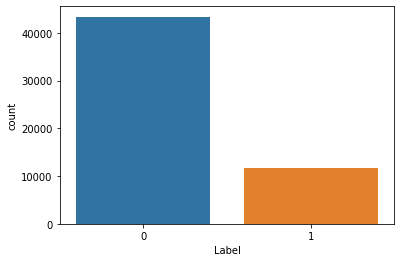

In [24]:
sns.countplot(df['Label']) # plotting the Label column count (0: non-hate, 1: hate).

We can see from the above plot, the dataset are unbalanced.

In [25]:
df.describe()

,Label
count,55188.000000
mean,0.213633
std,0.409875
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55188 entries, 0 to 3727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    55188 non-null  object
 1   Label   55188 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.3+ MB


In [27]:
np.sum(df.isnull().any(axis=1)) # check the number of NaN values in every column

0

In [28]:
len(df['Text'].unique()) # Count distinct values in columns

51310

In [29]:
df[df.Text.duplicated()].count() # Count the number of duplicate rows

Text     3878
Label    3878
dtype: int64

In [30]:
df.drop_duplicates('Text', inplace=True) # removing duplicate rows

In [31]:
print('Count of rows in the data is:  ', len(df)) # counting the rows after removing duplicates

Count of rows in the data is:   51310


In [32]:
df['Length_of_text'] = df['Text'].apply(lambda x : len(x)) # creating a new column of the text length
df.head(10)

,Text,Label,Length_of_text
0,Damn I thought they had strict gun laws in Ger...,0,50
1,I dont care about what it stands for or anythi...,0,89
2,It's not a group it's an idea lol,0,33
3,So it's not just America!,0,25
4,The dog is a spectacular dancer considering he...,0,65
5,If ppl dont wear masks you complain... If ppl ...,0,75
6,We should send them All back to africa,1,39
7,Checking to see if it's whataboutism from the ...,0,97
8,"As a european, I approve this.",0,30
9,"Idk which of these groups to join, they're all...",0,54


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a0716f3d0>,
      dtype=object)

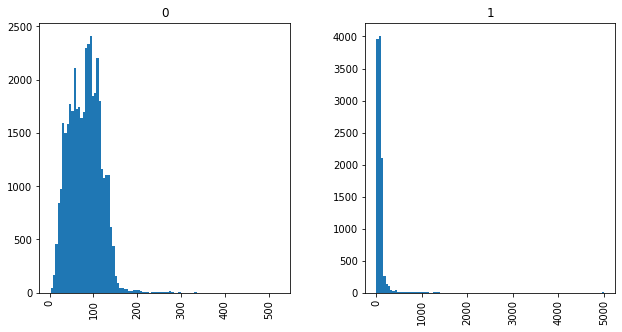

In [33]:
df.hist(column='Length_of_text', by='Label', bins=100, figsize=(10,5)) #distribution of tweets

We can see that some of the hate speech texts can be long up to 1000 words, while the longest non-hate texts is less than 500 words.

the majority of both-classes text length tend to be the same.

- Data Wordcloud Visualization

1.   Hate speech wordcloud

2.   Non hate speech wordcloud

In [34]:
hate= df[df.Label==1]['Text'].values
Non_hate= df[df.Label==0]['Text'].values

(-0.5, 399.5, 199.5, -0.5)

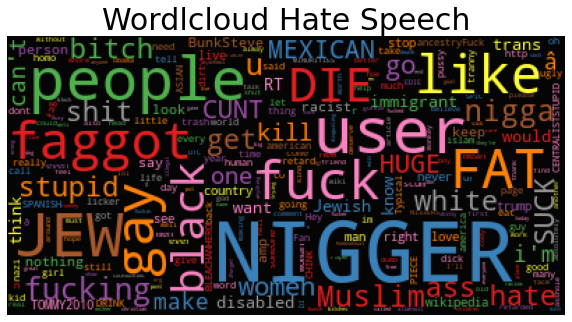

In [35]:

stopwords = set(stopwords.words("english"))

plt.figure(figsize=(10,8))
wc = WordCloud(background_color="black", max_words=500,stopwords=stopwords, max_font_size= 60, collocations=False)
wc.generate(" ".join(hate))
plt.title("Wordlcloud Hate Speech", fontsize=30)
plt.imshow(wc.recolor( colormap= 'Set1' , random_state=1), alpha=0.98)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

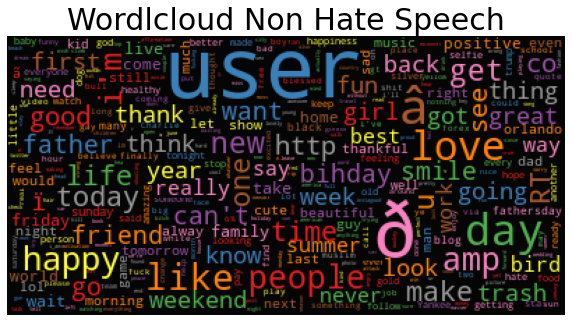

In [36]:
plt.figure(figsize=(10,8))
wc = WordCloud(background_color="black", max_words=500,stopwords=stopwords, max_font_size= 60, collocations=False)
wc.generate(" ".join(Non_hate))
plt.title("Wordlcloud Non Hate Speech", fontsize=30)
plt.imshow(wc.recolor( colormap= 'Set1' , random_state=1), alpha=0.98)
plt.axis('off')

### Data Cleaning and Pre-Processing.

- Removing all stopwords, punctuation, emojis, emotions, symbols, flags, special characters, handles, numbers.
- Replacing apostrophe words, and short words.
- Stemming and lemmatization.
- Plotting the most common words from the text.
- Word cloud of common hate words of cleaned text.
- Prepare the text for vectorization.

In [37]:
stemmer = nltk.SnowballStemmer("english")
lm = nltk.WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [38]:
emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)

In [39]:
def text_processing (texts):
  texts = str(texts).lower()

  texts = re.sub(r"he's", "he is", texts)
  texts = re.sub(r"there's", "there is", texts)
  texts = re.sub(r"We're", "We are", texts)
  texts = re.sub(r"That's", "That is", texts)
  texts = re.sub(r"won't", "will not", texts)
  texts = re.sub(r"they're", "they are", texts)
  texts = re.sub(r"Can't", "Cannot", texts)
  texts = re.sub(r"wasn't", "was not", texts)
  texts = re.sub(r"don\x89Ûªt", "do not", texts)
  texts = re.sub(r"aren't", "are not", texts)
  texts = re.sub(r"isn't", "is not", texts)
  texts = re.sub(r"What's", "What is", texts)
  texts = re.sub(r"haven't", "have not", texts)
  texts = re.sub(r"hasn't", "has not", texts)
  texts = re.sub(r"There's", "There is", texts)
  texts = re.sub(r"He's", "He is", texts)
  texts = re.sub(r"It's", "It is", texts)
  texts = re.sub(r"You're", "You are", texts)
  texts = re.sub(r"I'M", "I am", texts)
  texts = re.sub(r"shouldn't", "should not", texts)
  texts = re.sub(r"wouldn't", "would not", texts)
  texts = re.sub(r"i'm", "I am", texts)
  texts = re.sub(r"I\x89Ûªm", "I am", texts)
  texts = re.sub(r"I'm", "I am", texts)
  texts = re.sub(r"Isn't", "is not", texts)
  texts = re.sub(r"Here's", "Here is", texts)
  texts = re.sub(r"you've", "you have", texts)
  texts = re.sub(r"you\x89Ûªve", "you have", texts)
  texts = re.sub(r"we're", "we are", texts)
  texts = re.sub(r"what's", "what is", texts)
  texts = re.sub(r"couldn't", "could not", texts)
  texts = re.sub(r"we've", "we have", texts)
  texts = re.sub(r"it\x89Ûªs", "it is", texts)
  texts = re.sub(r"doesn\x89Ûªt", "does not", texts)
  texts = re.sub(r"It\x89Ûªs", "It is", texts)
  texts = re.sub(r"Here\x89Ûªs", "Here is", texts)
  texts = re.sub(r"who's", "who is", texts)
  texts = re.sub(r"I\x89Ûªve", "I have", texts)
  texts = re.sub(r"y'all", "you all", texts)
  texts = re.sub(r"can\x89Ûªt", "cannot", texts)
  texts = re.sub(r"would've", "would have", texts)
  texts = re.sub(r"it'll", "it will", texts)
  texts = re.sub(r"we'll", "we will", texts)
  texts = re.sub(r"wouldn\x89Ûªt", "would not", texts)
  texts = re.sub(r"We've", "We have", texts)
  texts = re.sub(r"he'll", "he will", texts)
  texts = re.sub(r"Y'all", "You all", texts)
  texts = re.sub(r"Weren't", "Were not", texts)
  texts = re.sub(r"Didn't", "Did not", texts)
  texts = re.sub(r"they'll", "they will", texts)
  texts = re.sub(r"they'd", "they would", texts)
  texts = re.sub(r"DON'T", "DO NOT", texts)
  texts = re.sub(r"That\x89Ûªs", "That is", texts)
  texts = re.sub(r"they've", "they have", texts)
  texts = re.sub(r"i'd", "I would", texts)
  texts = re.sub(r"should've", "should have", texts)
  texts = re.sub(r"You\x89Ûªre", "You are", texts)
  texts = re.sub(r"where's", "where is", texts)
  texts = re.sub(r"Don\x89Ûªt", "Do not", texts)
  texts = re.sub(r"we'd", "we would", texts)
  texts = re.sub(r"i'll", "I will", texts)
  texts = re.sub(r"weren't", "were not", texts)
  texts = re.sub(r"They're", "They are", texts)
  texts = re.sub(r"Can\x89Ûªt", "Cannot", texts)
  texts = re.sub(r"you\x89Ûªll", "you will", texts)
  texts = re.sub(r"I\x89Ûªd", "I would", texts)
  texts = re.sub(r"let's", "let us", texts)
  texts = re.sub(r"it's", "it is", texts)
  texts = re.sub(r"can't", "cannot", texts)
  texts = re.sub(r"don't", "do not", texts)
  texts = re.sub(r"you're", "you are", texts)
  texts = re.sub(r"i've", "I have", texts)
  texts = re.sub(r"that's", "that is", texts)
  texts = re.sub(r"i'll", "I will", texts)
  texts = re.sub(r"doesn't", "does not", texts)
  texts = re.sub(r"i'd", "I would", texts)
  texts = re.sub(r"didn't", "did not", texts)
  texts = re.sub(r"ain't", "am not", texts)
  texts = re.sub(r"you'll", "you will", texts)
  texts = re.sub(r"I've", "I have", texts)
  texts = re.sub(r"Don't", "do not", texts)
  texts = re.sub(r"dont", "do not", texts)
  texts = re.sub(r"I'll", "I will", texts)
  texts = re.sub(r"I'd", "I would", texts)
  texts = re.sub(r"Let's", "Let us", texts)
  texts = re.sub(r"you'd", "You would", texts)
  texts = re.sub(r"It's", "It is", texts)
  texts = re.sub(r"Ain't", "am not", texts)
  texts = re.sub(r"Haven't", "Have not", texts)
  texts = re.sub(r"Could've", "Could have", texts)
  texts = re.sub(r"youve", "you have", texts)  
  texts = re.sub(r"donå«t", "do not", texts) 

  text = re.sub(r"[^a-zA-Z0-9]", " ", texts)

  texts = re.sub('\[.*?\]', '', texts)
  texts = re.sub('https?://\S+|www\.\S+', '', texts)
  texts = re.sub('<.*?>+', '', texts)
  texts = re.sub('\n', '', texts)
  texts = re.sub('\w*\d\w*', '', texts)
  texts =  emoji_pattern.sub(r'', texts)
  texts = [char for char in texts if char not in string.punctuation]
  
  texts = ''.join(texts)
  texts = [word for word in texts.split() if word not in stopwords.words('english')]

  texts = [word for word in texts if '@' not in word]

  texts = [stemmer.stem(word) for word in texts]
  texts = [ word for word in texts if len(word)>1]
  return [lm.lemmatize(word) for word in texts]

  

Here, I will create a dictionary of short words for replacement.

In [40]:
dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "i am not a lawyer",
"ic": "i see",
"idk": "i don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "im posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"TY": "thank you",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great",
"lol": "laugh out loud",
"rt": "retweet",
"imho": "in my humble opinion",
"ayfkmwts": "are you fucking kidding me with this shit",
"gtfooh": "get the fuck out of here",
"gmafb": "give me a fucking break",
"stfu": "shut the fuck up",
"lmao": "laughing my ass off",
"qotd": "quote of the day",
"yw": "you're welcome",
"nsfw": "not safe for work",
"sfw": "safe for work",
"fagg0t": "faggot",
"n1gger": "nigger",
}

In [41]:
dict.keys()

dict_keys(['121', 'a/s/l', 'adn', 'afaik', 'afk', 'aight', 'alol', 'b4', 'b4n', 'bak', 'bf', 'bff', 'bfn', 'bg', 'bta', 'btw', 'cid', 'cnp', 'cp', 'cu', 'cul', 'cul8r', 'cya', 'cyo', 'dbau', 'fud', 'fwiw', 'fyi', 'g', 'g2g', 'ga', 'gal', 'gf', 'gfn', 'gmbo', 'gmta', 'h8', 'hagn', 'hdop', 'hhis', 'iac', 'ianal', 'ic', 'idk', 'imao', 'imnsho', 'imo', 'iow', 'ipn', 'irl', 'jk', 'l8r', 'ld', 'ldr', 'llta', 'lmao', 'lmirl', 'lol', 'ltr', 'lulab', 'lulas', 'luv', 'm/f', 'm8', 'milf', 'oll', 'omg', 'otoh', 'pir', 'ppl', 'r', 'rofl', 'rpg', 'ru', 'shid', 'somy', 'sot', 'thanx', 'thx', 'TY', 'ttyl', 'u', 'ur', 'uw', 'wb', 'wfm', 'wibni', 'wtf', 'wtg', 'wtgp', 'ym', 'gr8', 'rt', 'imho', 'ayfkmwts', 'gtfooh', 'gmafb', 'stfu', 'qotd', 'yw', 'nsfw', 'sfw', 'fagg0t', 'n1gger'])

I first created a function for replacing the short words and then I applied the function and stored the data in a new column (clean_Text).
And then, I applied the preprocessing function on the text again, and i stored it in a new column (clean_Text2)

In [42]:
#function for replacing short words
def multiple_replace(d, text):
    # Create a regular expression from the dictionary keys
    regex = re.compile("(%s)" % "|".join(["\\b" + x + "\\b" for x in d.keys()]))

    # For each match, look-up corresponding value in dictionary
    return regex.sub(lambda mo: d[mo.string[mo.start():mo.end()]], text)

In [43]:
df['clean_Text'] = df['Text'].apply(lambda x: multiple_replace(dict, x.lower()))
df.head()

,Text,Label,Length_of_text,clean_Text
0,Damn I thought they had strict gun laws in Ger...,0,50,damn i thought they had strict gun laws in ger...
1,I dont care about what it stands for or anythi...,0,89,i dont care about what it stands for or anythi...
2,It's not a group it's an idea lol,0,33,it's not a group it's an idea laugh out loud
3,So it's not just America!,0,25,so it's not just america!
4,The dog is a spectacular dancer considering he...,0,65,the dog is a spectacular dancer considering he...


In [44]:
from nltk.corpus import stopwords
df['clean_Text2'] =df['clean_Text'].apply(lambda x: text_processing(x))

df.head()

,Text,Label,Length_of_text,clean_Text,clean_Text2
0,Damn I thought they had strict gun laws in Ger...,0,50,damn i thought they had strict gun laws in ger...,"[damn, thought, strict, gun, law, germani]"
1,I dont care about what it stands for or anythi...,0,89,i dont care about what it stands for or anythi...,"[care, stand, anyth, connect, like, shield]"
2,It's not a group it's an idea lol,0,33,it's not a group it's an idea laugh out loud,"[group, idea, laugh, loud]"
3,So it's not just America!,0,25,so it's not just america!,[america]
4,The dog is a spectacular dancer considering he...,0,65,the dog is a spectacular dancer considering he...,"[dog, spectacular, dancer, consid, two, left, ..."


Listing the most common words from the clean text column.

In [45]:
all_words_nsw = list(itertools.chain(*df['clean_Text2']))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('user', 17206),
 ('nigger', 3453),
 ('like', 3442),
 ('peopl', 3392),
 ('love', 3136),
 ('day', 3042),
 ('fuck', 2761),
 ('get', 2513),
 ('go', 2205),
 ('happi', 2079),
 ('make', 1803),
 ('retweet', 1728),
 ('jew', 1724),
 ('amp', 1705),
 ('gay', 1622)]

In [46]:
# List of the most common words
top_15 = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

top_15.head(15)

,words,count
0,user,17206
1,nigger,3453
2,like,3442
3,peopl,3392
4,love,3136
5,day,3042
6,fuck,2761
7,get,2513
8,go,2205
9,happi,2079


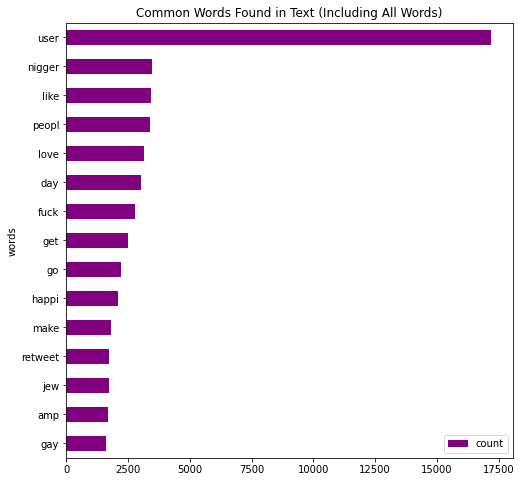

In [47]:
# Plot horizontal bar graph of the most common words
fig, ax = plt.subplots(figsize=(8, 8))
top_15.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Text (Including All Words)")

plt.show()

I will combine the words in the clean_Text2 column, for vectorization and store it in a new column (final_Text).

In [48]:
# Preparing the text for vectorization
def join_fun(text):
    string=" "
    ans=string.join(text)
    return ans
df['final_Text']=df['clean_Text2'].apply(lambda x:join_fun(x))

In [49]:
df.head()

,Text,Label,Length_of_text,clean_Text,clean_Text2,final_Text
0,Damn I thought they had strict gun laws in Ger...,0,50,damn i thought they had strict gun laws in ger...,"[damn, thought, strict, gun, law, germani]",damn thought strict gun law germani
1,I dont care about what it stands for or anythi...,0,89,i dont care about what it stands for or anythi...,"[care, stand, anyth, connect, like, shield]",care stand anyth connect like shield
2,It's not a group it's an idea lol,0,33,it's not a group it's an idea laugh out loud,"[group, idea, laugh, loud]",group idea laugh loud
3,So it's not just America!,0,25,so it's not just america!,[america],america
4,The dog is a spectacular dancer considering he...,0,65,the dog is a spectacular dancer considering he...,"[dog, spectacular, dancer, consid, two, left, ...",dog spectacular dancer consid two left foot


In [50]:
hateClean= df[df.Label==1]['final_Text'].values
Non_hateClean= df[df.Label==0]['final_Text'].values

(-0.5, 399.5, 199.5, -0.5)

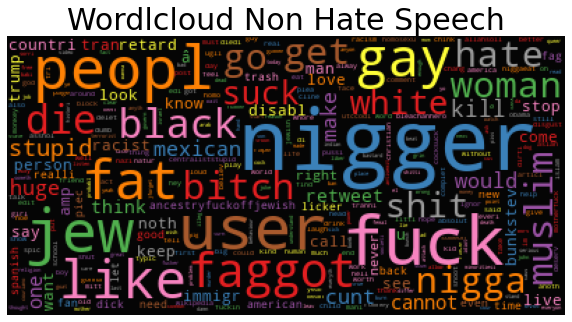

In [51]:
stop_words = set(stopwords.words("english"))

plt.figure(figsize=(10,8))
wc = WordCloud(background_color="black", max_words=500,stopwords=stop_words, max_font_size= 60, collocations=False)
wc.generate(" ".join(hateClean))
plt.title("Wordlcloud Non Hate Speech", fontsize=30)
plt.imshow(wc.recolor( colormap= 'Set1' , random_state=1), alpha=0.98)
plt.axis('off')

## Creating the Models 
Machine Learning Models will be trained using the CounterVectorizer and TF-IDFVectorizer, while Neural Network Models will be trained on tokenized text.

The cleaned dataset will be split into train and test for processing.

I will generate two functions using the (Vec, and TFIDF) on data, that will iterate over trainsets and testsets using multiple models, making predictions, and produce results, the evaluation metrics that will be used are (Accuracy, F1, MCC, Confusion Matrix, Classification report, and ROC plot). But I will mainly focus on the F1, and the MCC for this project due to the unbalanced data issue.

I will use class_weight tool to tackle the unbalanced data problem.

The algorithms that will be trained and tested are the MultinomialNB, support vector mechanism (SVC, and Linear SVC), XGBClassifier, Random Forest, deep learning (RNN, CNN).

In [52]:
X = df['final_Text']
y= df['Label']

In [53]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [54]:
# exported_pipeline = make_pipeline(
#     RFE(estimator=ExtraTreesClassifier(criterion="gini", max_features=0.7500000000000001, n_estimators=100), step=0.3),
#     LinearSVC(C=5.0, dual=False, loss="squared_hinge", penalty="l1", tol=0.1))


In [55]:
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y= ytrain)

cv = CountVectorizer()
tfidf = TfidfVectorizer(stop_words='english')
model_MNB = MultinomialNB()
svc = SVC(class_weight='balanced',random_state=30)
rfc_model = RandomForestClassifier(class_weight='balanced',random_state=30)
model_xgb = xgb.XGBClassifier(sample_weight=classes_weights)
#Exported pipline Linear svc model sugested by TPot.
exported_pipeline_Lsvc = make_pipeline(
    RFE(estimator=ExtraTreesClassifier(criterion="gini", max_features=0.7500000000000001, n_estimators=100), step=0.3),
    LinearSVC(C=5.0, dual=False, loss="squared_hinge", penalty="l1", tol=0.1))


Function#1: Will be processing TF-IDF vectorized data.

In [56]:
acc_name_dict = {}
acc_name_list = []
f1_name_list = []
mss_name_list= []

def select_model_TFIDF(model, tfidf=tfidf, X_train=Xtrain, X_test = Xtest, y_test = ytest, y_train=ytrain):
    operation = [('tfidf',tfidf),('model',model)]
    pipe = Pipeline(operation)
    pipe.fit(X_train,y_train)
    prediction = pipe.predict(X_test)
    modelName = type(model).__name__+'_TF'
    acc = accuracy_score(y_test,prediction)
    #acc_name_dict[modelName] = accuracy_score(y_test,prediction)
    acc_name_list.append([modelName, acc])
    f1 = f1_score(y_test,prediction)
    f1_name_list.append([modelName, f1])
    mcc= matthews_corrcoef(y_test,prediction)
    mss_name_list.append([modelName, mcc])

    print(f'Model Name:{modelName}')
    print('accuracy:',acc)
    print(confusion_matrix(y_test,prediction))
    print(classification_report(y_test,prediction))
    print('The f1 score for the testing data:', f1)
    print("MCC: ", mcc)
    plot_roc_curve(pipe,X_test,y_test)


Function#2: Will be processing Counter Vectorized data.

In [57]:
def select_model_Vec(model, Vec=cv, X_train=Xtrain, X_test = Xtest, y_test = ytest, y_train=ytrain):
    operation = [('Vec',Vec),('model',model)]
    pipe = Pipeline(operation)
    pipe.fit(X_train,y_train)
    prediction = pipe.predict(X_test)
    modelName = type(model).__name__+'_Vec'
    acc = accuracy_score(y_test,prediction)
    acc_name_list.append([modelName, acc])
    f1 = f1_score(y_test,prediction)
    f1_name_list.append([modelName, f1])
    mcc= matthews_corrcoef(y_test,prediction)
    mss_name_list.append([modelName, mcc])

    print(f'Model Name:{modelName}')
    print('accuracy:',acc)
    print(confusion_matrix(y_test,prediction))
    print(classification_report(y_test,prediction))
    print('The f1 score for the testing data:', f1)
    print("MCC: ", mcc)
    plot_roc_curve(pipe,X_test,y_test)

1- MultinomialNB Model

Multinomial Naive Bayes is aprobabilistic model and specialized version of NaiveBayes. it explicitly models the word counts and adjusts the underlying calculations to deal with in.

Model Name:MultinomialNB_TF
accuracy: 0.8597739232118495
[[8011   74]
 [1365  812]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      8085
           1       0.92      0.37      0.53      2177

    accuracy                           0.86     10262
   macro avg       0.89      0.68      0.72     10262
weighted avg       0.87      0.86      0.84     10262

The f1 score for the testing data: 0.5301991511589944
MCC:  0.5296038659153808


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


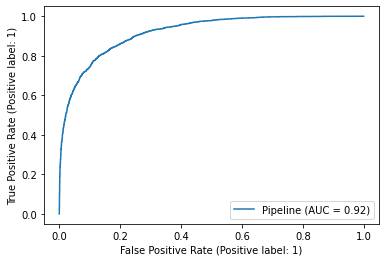

In [58]:
select_model_TFIDF(model_MNB)

Model Name:MultinomialNB_Vec
accuracy: 0.8849152212044435
[[7565  520]
 [ 661 1516]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      8085
           1       0.74      0.70      0.72      2177

    accuracy                           0.88     10262
   macro avg       0.83      0.82      0.82     10262
weighted avg       0.88      0.88      0.88     10262

The f1 score for the testing data: 0.7196771896510801
MCC:  0.6479485566008754


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


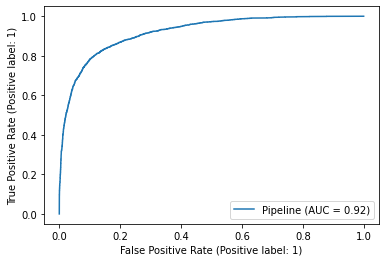

In [59]:
select_model_Vec(model_MNB)

The high scores of accuracy in the MNB model is not due to the success of the model, but due to the unbalanced data set.

Thus, In the upcoming models i will use class weight method method of (class_weight="balanced"), which directly modify the loss function by giving more (or less) penalty to the classes with more (or less) weight.



2- SVC Model

Support Vector Classifier, can be used for both regression and classification tasks. But, it is widely used in classification objectives, The objective of svm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.


Model Name:SVC_TF
accuracy: 0.907328006236601
[[7595  490]
 [ 461 1716]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      8085
           1       0.78      0.79      0.78      2177

    accuracy                           0.91     10262
   macro avg       0.86      0.86      0.86     10262
weighted avg       0.91      0.91      0.91     10262

The f1 score for the testing data: 0.7830253251197811
MCC:  0.7241359494987574


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


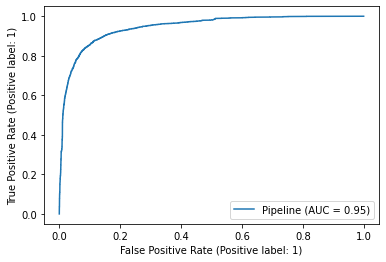

In [60]:
select_model_TFIDF(svc) 

Model Name:SVC_Vec
accuracy: 0.8767296823231339
[[7335  750]
 [ 515 1662]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      8085
           1       0.69      0.76      0.72      2177

    accuracy                           0.88     10262
   macro avg       0.81      0.84      0.82     10262
weighted avg       0.88      0.88      0.88     10262

The f1 score for the testing data: 0.724340814992373
MCC:  0.6466296664908521


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


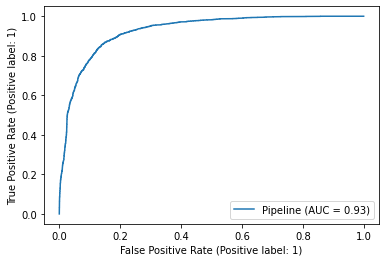

In [61]:
select_model_Vec(svc)

Model Name:Pipeline_TF
accuracy: 0.8945624634574157
[[7595  490]
 [ 592 1585]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      8085
           1       0.76      0.73      0.75      2177

    accuracy                           0.89     10262
   macro avg       0.85      0.83      0.84     10262
weighted avg       0.89      0.89      0.89     10262

The f1 score for the testing data: 0.7455315145813733
MCC:  0.6793961487018102


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


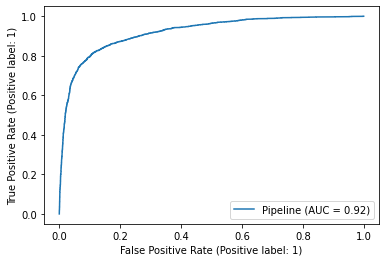

In [62]:
select_model_TFIDF(exported_pipeline_Lsvc) 

Model Name:Pipeline_Vec
accuracy: 0.8949522510231923
[[7582  503]
 [ 575 1602]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      8085
           1       0.76      0.74      0.75      2177

    accuracy                           0.89     10262
   macro avg       0.85      0.84      0.84     10262
weighted avg       0.89      0.89      0.89     10262

The f1 score for the testing data: 0.7482484820177487
MCC:  0.6820550097546985


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



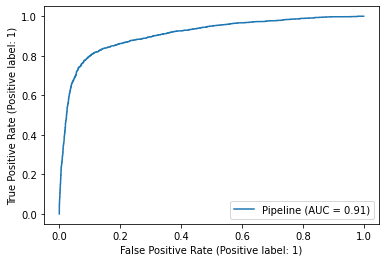

In [119]:
select_model_Vec(exported_pipeline_Lsvc)

3- XGBclassifier model

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance. XGBoost stands for eXtreme Gradient Boosting.

Model Name:XGBClassifier_TF
accuracy: 0.8568505164685246
[[7914  171]
 [1298  879]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8085
           1       0.84      0.40      0.54      2177

    accuracy                           0.86     10262
   macro avg       0.85      0.69      0.73     10262
weighted avg       0.85      0.86      0.84     10262

The f1 score for the testing data: 0.5447784319801673
MCC:  0.5161324480800549


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



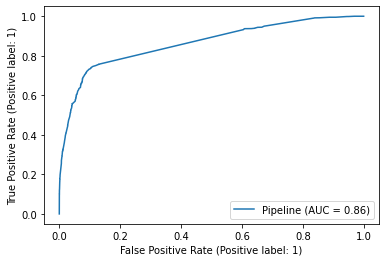

In [120]:
select_model_TFIDF(model_xgb)

Model Name:XGBClassifier_Vec
accuracy: 0.8590917949717404
[[7896  189]
 [1257  920]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8085
           1       0.83      0.42      0.56      2177

    accuracy                           0.86     10262
   macro avg       0.85      0.70      0.74     10262
weighted avg       0.86      0.86      0.84     10262

The f1 score for the testing data: 0.5599513085818625
MCC:  0.5256995267166189


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



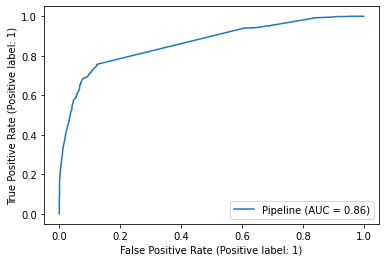

In [121]:
select_model_Vec(model_xgb)

4- Random Forest model

It is an ensemble approach combining multiple decision trees and producing them randomly without defining the rules. It transforms its output in to a probability value which can be mapped to two or more discrete classes.

In [ ]:
select_model_TFIDF(rfc_model)

Model Name:RandomForestClassifier_Vec
accuracy: 0.8902748002338725
[[7662  423]
 [ 703 1474]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      8085
           1       0.78      0.68      0.72      2177

    accuracy                           0.89     10262
   macro avg       0.85      0.81      0.83     10262
weighted avg       0.89      0.89      0.89     10262

The f1 score for the testing data: 0.7236131566028474
MCC:  0.6579841237455568


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



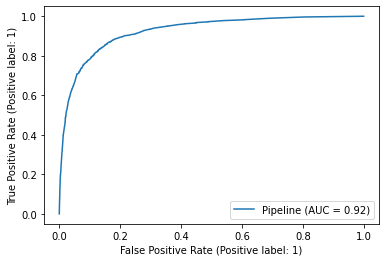

In [123]:
select_model_Vec(rfc_model)

The SVC_TF-IDF model gave the highest accuracy among the other ML models and the highest F1 scores so far, but the F1 is still considered not really high, which means that the scores are low in detecting the hate speech.




In [ ]:
acc_name_list

In [ ]:
f1_name_list


In [ ]:
mss_name_list

5- Neural network models

Now, I will use nerual network to do the classification task, neural networks are good in text classification problems because they can capture non-linear relationships.

To do so I will start by Preparing the data for the Neural network models (Tokenization, and turn it into a matrix of sequence).

I'm also going to use undersampling to address the unbalanced data issue.

In [127]:
data_hate = df[df['Label'] == 1]
data_nohate = df[df['Label'] == 0]

In [128]:
data_hate = data_hate.iloc[:int(8000)]
data_nohate = data_nohate.iloc[:int(8000)]

In [129]:
dataset = pd.concat([data_hate, data_nohate])

In [130]:
A = dataset['clean_Text2']
b = dataset['Label']

In [131]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(A)
sequences = tok.texts_to_sequences(A)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [132]:
L = sequences_matrix.shape
L

(16000, 500)

Split the data and create Recurrent Neural Network (RNN) model for training

The model will consist of:
    1. input layer.
    2. embedding layer (maps each word into dense vector in the latent space, close words wiil be closed at the 
    3. LSTM variant (Variants of the RNN have proven to be successful in many NLP tasks and we think that it will perform well with classification tasks)
    4. Dense layer 
    5. output layer (activation is sigmoid which gives us a  probability of the sample being in each category).


In [133]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, b, test_size=0.2, random_state=0)

In [214]:
stop = EarlyStopping(
    monitor='val_accuracy', 
    mode='max',
    patience=5
)

def tensorflow_based_model(): 
    i = Input(name='inputs',shape=[max_len])
    x = Embedding(2000,50,input_length=max_len)(i) 
    x = LSTM(64)(x) 
    x = Dense(64,name='FC1')(x)
    x = Activation('relu')(x) 
    x = Dropout(0.2)(x) 
    x = Dense(1, name='out_layer')(x) 
    x = Activation('sigmoid')(x)
    model = Model(inputs=i,outputs=x) 
    return model 

In [215]:
model = tensorflow_based_model() 
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])  

In [216]:
history=model.fit(X_train,Y_train,batch_size=180, epochs=10, callbacks=[stop], validation_split=0.2)
print('Training finished !!')

Epoch 1/10
57/57 [==============================] - 65s 1s/step - loss: 0.5748 - accuracy: 0.7210 - val_loss: 0.4013 - val_accuracy: 0.8211
Epoch 2/10
57/57 [==============================] - 57s 1s/step - loss: 0.4949 - accuracy: 0.7973 - val_loss: 0.3659 - val_accuracy: 0.8488
Epoch 3/10
57/57 [==============================] - 58s 1s/step - loss: 0.2947 - accuracy: 0.8787 - val_loss: 0.3349 - val_accuracy: 0.8590
Epoch 4/10
57/57 [==============================] - 57s 998ms/step - loss: 0.2584 - accuracy: 0.8920 - val_loss: 0.3247 - val_accuracy: 0.8652
Epoch 5/10
57/57 [==============================] - 57s 999ms/step - loss: 0.2450 - accuracy: 0.9004 - val_loss: 0.3299 - val_accuracy: 0.8594
Epoch 6/10
57/57 [==============================] - 57s 1s/step - loss: 0.2260 - accuracy: 0.9066 - val_loss: 0.3330 - val_accuracy: 0.8629
Epoch 7/10
57/57 [==============================] - 57s 995ms/step - loss: 0.2280 - accuracy: 0.9074 - val_loss: 0.3434 - val_accuracy: 0.8652
Epoch 8/10


In [217]:
accr1 = model.evaluate(X_test,Y_test) 

100/100 [==============================] - 8s 77ms/step - loss: 0.3601 - accuracy: 0.8562


In [218]:
print('Test set\n  Accuracy: {:0.2f}'.format(accr1[1]))

Test set
  Accuracy: 0.86


In [219]:
acc_name_list.append(["RNN", accr1])

Prediction:

In [220]:
y_pred = model.predict(X_test) 
y_pred = (y_pred > 0.5) 

Text(33.0, 0.5, 'y_pred')

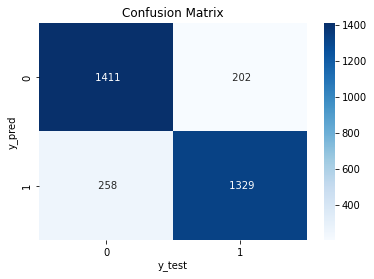

In [221]:
cm=confusion_matrix(Y_test,y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [222]:
print(classification_report(Y_test,y_pred))
f1_test_RNN = f1_score(Y_test,y_pred)
print('The f1 score for the testing data:', f1_test_RNN)

mcc_RNN= matthews_corrcoef(Y_test,y_pred)
print("MCC: ", mcc_RNN)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1613
           1       0.87      0.84      0.85      1587

    accuracy                           0.86      3200
   macro avg       0.86      0.86      0.86      3200
weighted avg       0.86      0.86      0.86      3200

The f1 score for the testing data: 0.8524695317511226
MCC:  0.7128362797196058


In [223]:
fig=px.line(history.history,y=['accuracy','val_accuracy'], 
            labels={'index':'epoch','value':'accuracy'}, 
            title=f'According to the epoch {model} accuracy and validation accuracy chart for the model')
fig.show()

Split the data and create Convolutional Neural Network model (CNN) for training:

The model will consist of: 1. input layer. 2. embedding layer 3. convolutional layer where most of the computation will be done 4. max pooling layer to extract the most significant elements in each convolution and turn them into a feature vector 4. dropout regularization, which will randomly disable a fraction of neurons in the layer (set to 20% here) to ensure that that model does not overfit. 5. Global Average pooling is a pooling operation designed to replace fully connected layers 6. Dense layer 7. Drop out layer 8. output layer (activation is sigmoid which gives us a probability of the sample being in each category).



In [183]:
def tensorflow_based_modelCNN(): 
    i = Input(name='inputs',shape=[max_len])
    x = Embedding(2000,50,input_length=max_len)(i) 
    x = Conv1D(256,activation='relu',kernel_size=5,padding='Same')(x) 
    x = MaxPooling1D()(x)
    x = Dropout(0.2)(x) 
    x = GlobalAveragePooling1D()(x) 
    x = Dense(256,activation='relu')(x) 
    x = Dropout(0.2)(x)
    x = Dense(1,activation='sigmoid')(x)
    x = Flatten()(x)
    modelCNN = Model(inputs=i,outputs=x) 
    return modelCNN 

modelCNN = tensorflow_based_modelCNN() 
modelCNN.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])  


In [184]:
history1 = modelCNN.fit(X_train,Y_train, batch_size=128, callbacks=[stop], verbose=1, validation_split=0.2, epochs=10)
print('Training finished !!')

Epoch 1/10
80/80 [==============================] - 62s 769ms/step - loss: 0.6653 - accuracy: 0.6356 - val_loss: 0.5658 - val_accuracy: 0.7816
Epoch 2/10
80/80 [==============================] - 60s 752ms/step - loss: 0.4422 - accuracy: 0.8183 - val_loss: 0.3948 - val_accuracy: 0.8301
Epoch 3/10
80/80 [==============================] - 60s 751ms/step - loss: 0.3400 - accuracy: 0.8608 - val_loss: 0.3684 - val_accuracy: 0.8457
Epoch 4/10
80/80 [==============================] - 61s 767ms/step - loss: 0.3079 - accuracy: 0.8769 - val_loss: 0.3523 - val_accuracy: 0.8508
Epoch 5/10
80/80 [==============================] - 60s 753ms/step - loss: 0.2780 - accuracy: 0.8888 - val_loss: 0.3566 - val_accuracy: 0.8512
Epoch 6/10
80/80 [==============================] - 60s 752ms/step - loss: 0.2583 - accuracy: 0.8949 - val_loss: 0.3460 - val_accuracy: 0.8570
Epoch 7/10
80/80 [==============================] - 61s 762ms/step - loss: 0.2494 - accuracy: 0.8981 - val_loss: 0.3332 - val_accuracy: 0.8586

In [185]:
accr2 = modelCNN.evaluate(X_test,Y_test) 

100/100 [==============================] - 5s 49ms/step - loss: 0.3538 - accuracy: 0.8612


In [186]:
print('Test set\n  Accuracy: {:0.2f}'.format(accr2[1]))

Test set
  Accuracy: 0.86


In [187]:
acc_name_list.append(["CNN", accr2])

Prediction:

In [188]:
y_predCNN = modelCNN.predict(X_test) 
y_predCNN = (y_predCNN > 0.5) 

Text(33.0, 0.5, 'y_pred')

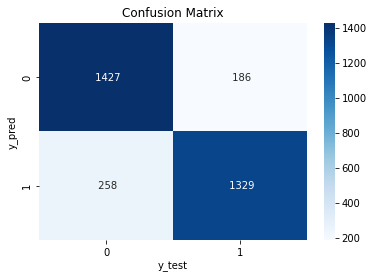

In [189]:
cm=confusion_matrix(Y_test,y_predCNN)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [190]:
print(classification_report(Y_test,y_predCNN))
f1_test_CNN = f1_score(Y_test,y_predCNN)
print('The f1 score for the testing data:', f1_test_CNN)

mcc_CNN= matthews_corrcoef(Y_test,y_predCNN)
print("MCC: ", mcc_CNN)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1613
           1       0.88      0.84      0.86      1587

    accuracy                           0.86      3200
   macro avg       0.86      0.86      0.86      3200
weighted avg       0.86      0.86      0.86      3200

The f1 score for the testing data: 0.8568665377176016
MCC:  0.7231133243753544


In [191]:
fig=px.line(history1.history,y=['accuracy','val_accuracy'], 
            labels={'index':'epoch','value':'accuracy'}, 
            title=f'According to the epoch {modelCNN} accuracy and validation accuracy chart for the model')
fig.show()

Comparing evaluation metrics results of all models using barchart:

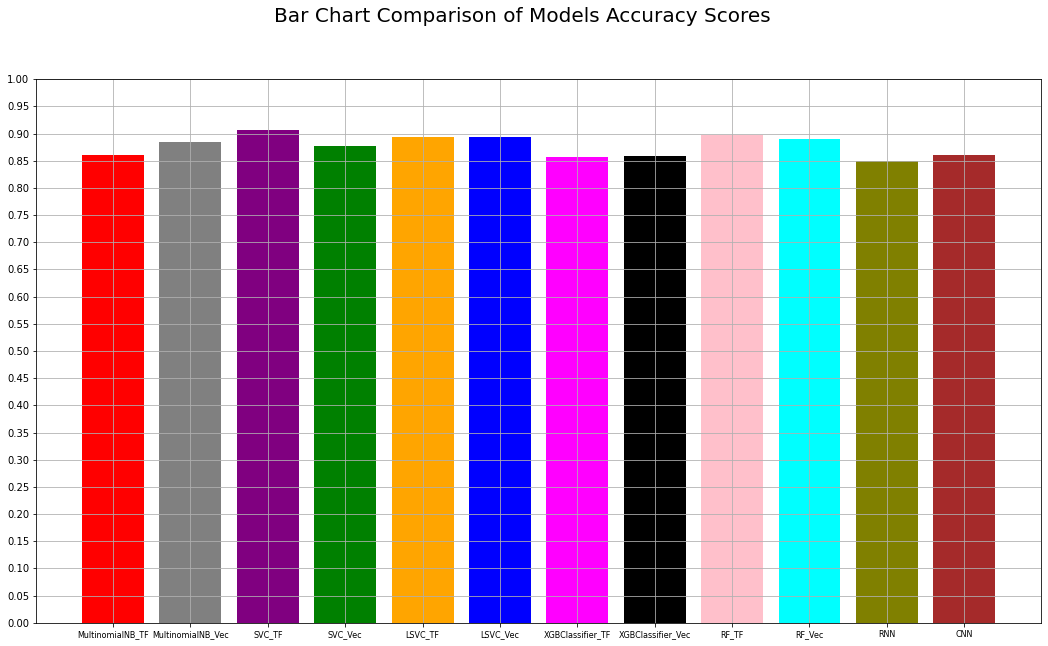

In [192]:
algorithms=("MultinomialNB_TF","MultinomialNB_Vec","SVC_TF","SVC_Vec","LSVC_TF","LSVC_Vec","XGBClassifier_TF","XGBClassifier_Vec", "RF_TF", "RF_Vec", "RNN", "CNN")
scores = (acc_name_list[0][1],acc_name_list[1][1],acc_name_list[2][1],acc_name_list[3][1],acc_name_list[4][1],acc_name_list[5][1], acc_name_list[6][1], acc_name_list[7][1], acc_name_list[8][1], acc_name_list[9][1], accr1[1], accr2[1] )
y_pos = np.arange(1,13)
colors = ("red","gray","purple","green","orange","blue","magenta","black","pink", "cyan", "olive", "brown")
plt.figure(figsize=(18,10))
plt.bar(y_pos,scores,color=colors)
plt.xticks(y_pos,algorithms,fontsize=8)
plt.yticks(np.arange(0.00, 1.01, step=0.05))
plt.grid()
plt.suptitle("Bar Chart Comparison of Models Accuracy Scores",fontsize=20)
plt.show()

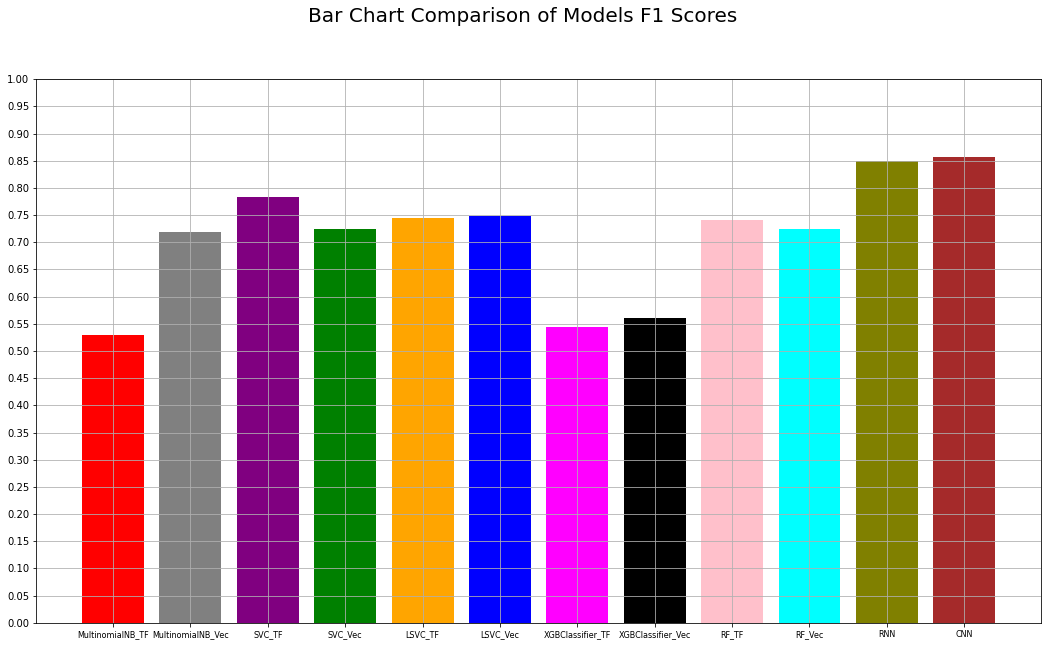

In [193]:
algorithms=("MultinomialNB_TF","MultinomialNB_Vec","SVC_TF","SVC_Vec","LSVC_TF","LSVC_Vec","XGBClassifier_TF","XGBClassifier_Vec", "RF_TF", "RF_Vec", "RNN", "CNN")
scores = (f1_name_list[0][1],f1_name_list[1][1],f1_name_list[2][1],f1_name_list[3][1],f1_name_list[4][1],f1_name_list[5][1], f1_name_list[6][1], f1_name_list[7][1], f1_name_list[8][1], f1_name_list[9][1], f1_test_RNN, f1_test_CNN )
y_pos = np.arange(1,13)
colors = ("red","gray","purple","green","orange","blue","magenta","black","pink", "cyan", "olive", "brown")
plt.figure(figsize=(18,10))
plt.bar(y_pos,scores,color=colors)
plt.xticks(y_pos,algorithms,fontsize=8)
plt.yticks(np.arange(0.00, 1.01, step=0.05))
plt.grid()
plt.suptitle("Bar Chart Comparison of Models F1 Scores",fontsize=20)
plt.show()

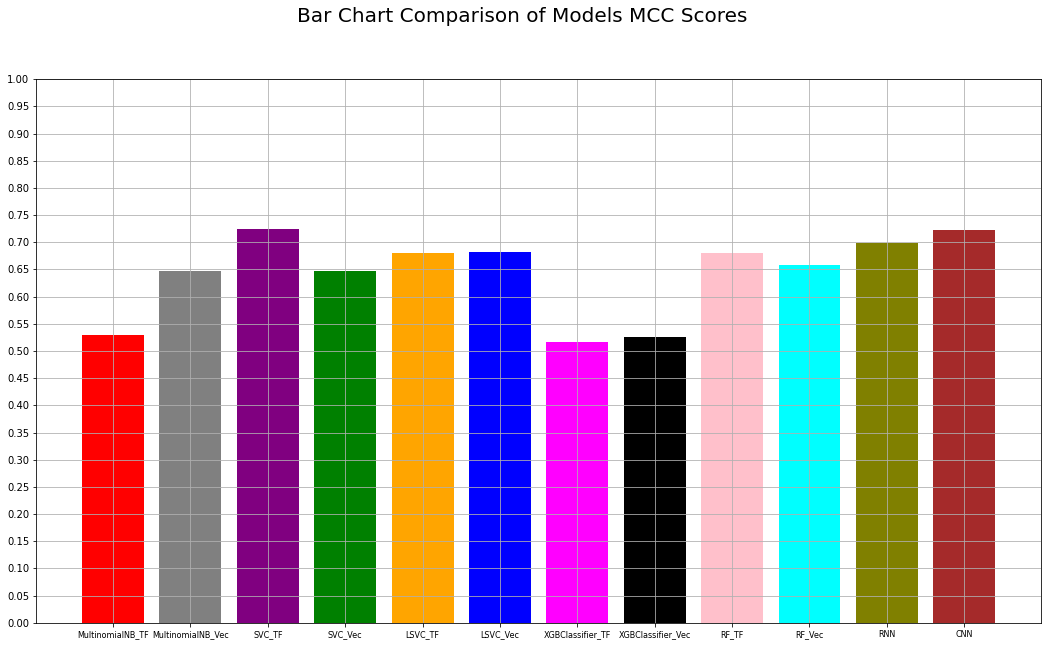

In [194]:
algorithms=("MultinomialNB_TF","MultinomialNB_Vec","SVC_TF","SVC_Vec", "LSVC_TF","LSVC_Vec","XGBClassifier_TF","XGBClassifier_Vec", "RF_TF", "RF_Vec", "RNN", "CNN")
scores = (mss_name_list[0][1],mss_name_list[1][1],mss_name_list[2][1],mss_name_list[3][1],mss_name_list[4][1],mss_name_list[5][1], mss_name_list[6][1], mss_name_list[7][1], mss_name_list[8][1], mss_name_list[9][1], mcc_RNN, mcc_CNN )
y_pos = np.arange(1,13)
colors = ("red","gray","purple","green","orange","blue","magenta","black","pink", "cyan", "olive", "brown")
plt.figure(figsize=(18,10))
plt.bar(y_pos,scores,color=colors)
plt.xticks(y_pos,algorithms,fontsize=8)
plt.yticks(np.arange(0.00, 1.01, step=0.05))
plt.grid()
plt.suptitle("Bar Chart Comparison of Models MCC Scores",fontsize=20)
plt.show() 

Using the model CNN to predict raw test data.

In [195]:
test = pd.read_csv('test.csv')

In [196]:
test.head()

,id,img,text
0,16395,img/16395.png,handjobs sold seperately
1,37405,img/37405.png,introducing fidget spinner for women
2,94180,img/94180.png,happy pride month let's go beat up lesbians
3,54321,img/54321.png,laughs in [majority of u.s crime rate]
4,97015,img/97015.png,finds out those 72 virgins.. are goats


In [197]:
test.drop(['id', 'img'], axis=1, inplace=True)

In [198]:
test['clean_Text'] = test['text'].apply(lambda x: multiple_replace(dict, x))
test['clean_text1'] = test['text'].apply(lambda x: text_processing(x))
test.head()

,text,clean_Text,clean_text1
0,handjobs sold seperately,handjobs sold seperately,"[handjob, sold, seper]"
1,introducing fidget spinner for women,introducing fidget spinner for women,"[introduc, fidget, spinner, woman]"
2,happy pride month let's go beat up lesbians,happy pride month let's go beat up lesbians,"[happi, pride, month, let, u, go, beat, lesbian]"
3,laughs in [majority of u.s crime rate],laughs in [majority of you.s crime rate],[laugh]
4,finds out those 72 virgins.. are goats,finds out those 72 virgins.. are goats,"[find, virgin, goat]"


In [199]:
test.shape

(1000, 3)

In [200]:
test['text'].isnull().sum()

0

In [201]:
max_len = 500
tok_test = Tokenizer(num_words=2000)
tok_test.fit_on_texts(test['clean_text1'])
sequences_test = tok_test.texts_to_sequences(test['clean_text1'])
sequences_matrix_test = sequence.pad_sequences(sequences_test,maxlen=max_len)

In [202]:
test['Weight'] = modelCNN.predict(sequences_matrix_test)

In [203]:
test.head()

,text,clean_Text,clean_text1,Weight
0,handjobs sold seperately,handjobs sold seperately,"[handjob, sold, seper]",0.061704
1,introducing fidget spinner for women,introducing fidget spinner for women,"[introduc, fidget, spinner, woman]",0.217908
2,happy pride month let's go beat up lesbians,happy pride month let's go beat up lesbians,"[happi, pride, month, let, u, go, beat, lesbian]",0.925731
3,laughs in [majority of u.s crime rate],laughs in [majority of you.s crime rate],[laugh],0.134219
4,finds out those 72 virgins.. are goats,finds out those 72 virgins.. are goats,"[find, virgin, goat]",0.994456


Plot the weights of prediction, I can see the number of weighs  over 0.5 are more.
and the lowest number of weigts of that equal to 0.5. 

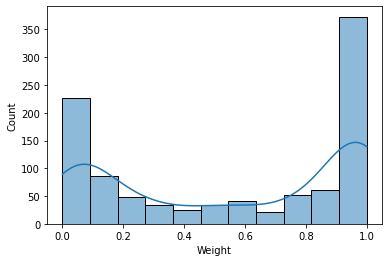

In [204]:
sns.histplot(test, x='Weight', kde=True)

In [205]:
# mid_weights= test[test['Weight']>0.45 & test['Weight']<0.55]
mid = test[(test['Weight'] >= 0.45) & (test['Weight'] <= 0.55)]

print(mid)

                                                  text  \
130                                   old barack obama   
137  if you want good life for your children kill t...   
153  we are never going to have social change until...   
164                                   old barack obama   
166   this project is tough but it will save the world   
175  the dishwasher was making a funny sound but i ...   
226  the dishwasher was making a funny sound but i ...   
243   this project is tough but it will save the world   
265       jack's links presents messing with sasquatch   
284  if you want good life for your children kill t...   
285  if you want good life for your children send t...   
312       jack's links presents messing with sasquatch   
331                       me watching the pride parade   
353                 the lawmakers known as "the squad"   
367          there's a 50% chance this phone is stolen   
385  capital punishment is still prevalent in many ...   
415         wh

As value for sigmoid function lies between 0 and 1 only so, result can be predicted easily to be 1 if value is greater than 0.5 and 0 otherwise. but, after studying the mid weights, i decided to shift the threshold value to 0.6 in order to get more precise estimation for prediction of minority class.

In [206]:
test['target_CNN'] = test['Weight'].map(lambda x: 1 if x > 0.6 else 0)

In [207]:
test.head()

,text,clean_Text,clean_text1,Weight,target_CNN
0,handjobs sold seperately,handjobs sold seperately,"[handjob, sold, seper]",0.061704,0
1,introducing fidget spinner for women,introducing fidget spinner for women,"[introduc, fidget, spinner, woman]",0.217908,0
2,happy pride month let's go beat up lesbians,happy pride month let's go beat up lesbians,"[happi, pride, month, let, u, go, beat, lesbian]",0.925731,1
3,laughs in [majority of u.s crime rate],laughs in [majority of you.s crime rate],[laugh],0.134219,0
4,finds out those 72 virgins.. are goats,finds out those 72 virgins.. are goats,"[find, virgin, goat]",0.994456,1


Using the SVC model to predict raw test data
I will prepare the test data for vectorization, and then I will train the svc model on the whole dataset before predicting the new test data.

In [208]:
def join_fun(text):
    string=" "
    ans=string.join(text)
    return ans
test['final_Text']=test['clean_text1'].apply(lambda y:join_fun(y))

In [ ]:
#train svc model on whole data
operation = [('tfidf',tfidf),('svc',svc)]
pipe = Pipeline(operation)
pipe.fit(X,y)
prediction = pipe.predict(X)
accuracy_score(y,prediction)


In [ ]:
f1 = f1_score(y,prediction)
f1

In [ ]:
#Predicting the new test data
test['target_svc']= pipe.predict(test['final_Text'])
test.head()

In [ ]:
final = test[['text', 'Weight', 'target_CNN', 'target_svc']]
final.head(30)

In [ ]:
final.to_csv('final.csv')
from google.colab import files
files.download("final.csv")

###Summary:

The spread of hate speech on social media has been adding significantly in recent years, both due to the obscurity and mobility of such platforms. A lot of effort from law enforcement and social media companies have been spent to address this issue, and it was becoming clear to everyone that automated semantic analysis is the best solution to fight this threat to societies, by capture implicit features that are potentially useful for classification and machine learning in detecting hate speech.

In this project, I undertook a thorough analysis to understand the data that I have collected from different sources using NLP and other EDA tools after I cleaned the data, and based on my understanding of the data, I created multiple models in machine learning and neural network to detect the features of hateful content. I conducted an evaluation on the models predictions to show which model scored the highest. 
The deep learning models achieved the highest F1 scores, while The SVC_TF-IDF achieved the highest accuracy score among all models, and high F1 score among non deep learning models, but still lower than the deep learning models.

At the end I used the trained models (CNN, SVC -Tf-IDF) to predict hate speech on new raw test data, and after reviewing texts and scores, the CNN gave better prediction scores.